# Epoch Spring Camp 2024 - Session 1 Tasks

## Task 1 : Implementing a 4-way kaleidoscope effect using NumPy and Matplotlib

### Part 1: Grayscale Images

To-do:

- Load/Generate a grayscale image using NumPy
- Apply a 4-way kaleidoscope transformation by reflecting and rotating the quadrants appropriately
- Use Matplotlib to visualize the transformed image

Let's import the necessary libraries first.

In [ ]:
# Import Pillow to load the image, NumPy for array manipulation, and Matplotlib to visualize the image.

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Next up, let's load up the image using Pillow, and display it using Matplotlib.

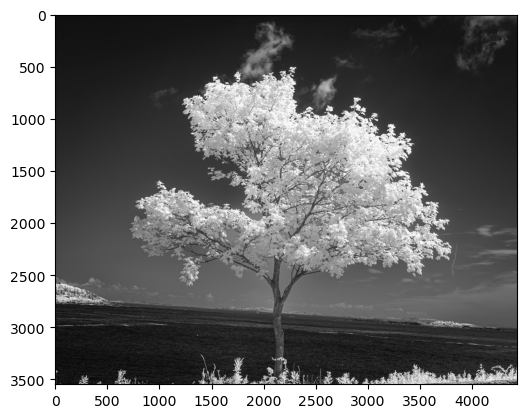

In [8]:
image = Image.open('task1_resources/grayscale.jpeg')

plt.imshow(image,cmap='gray')
plt.show()

We'll now convert the image data into a NumPy array using the `asarray` function, and we can still plot it.

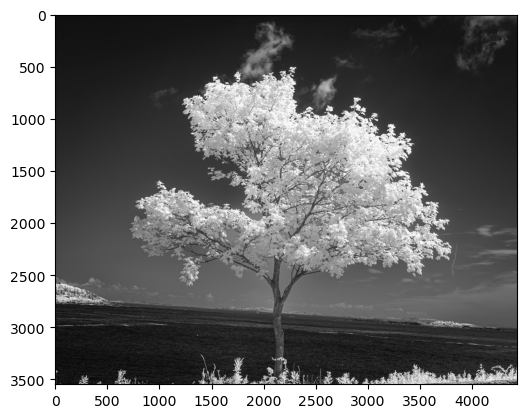

In [11]:
img_data = np.asarray(image)

plt.imshow(img_data,cmap='gray')
plt.show()

Let's now apply some transformation operations on this matrix to reflect it about the axes.

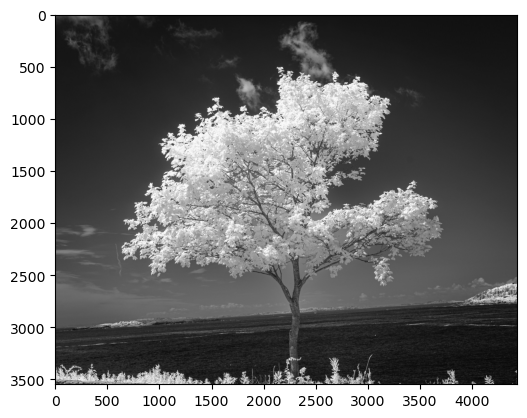

In [ ]:
# Flip about the X-axis
img_x_flipped = np.flip(img_data,axis=0)
# Flip about the Y-axis
img_y_flipped = np.flip(img_data,axis=1)
# Flip about both axes
img_full_flipped = np.flip(img_data)

Now that we have our data of the flipped images, let's now concatenate all 4 into a single array.

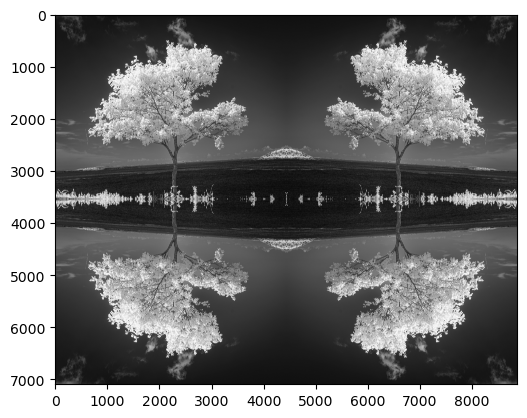

In [ ]:
# Concat the top two images
img_top_data = np.concatenate((img_y_flipped,img_data),axis=1)
# Concat the bottom two images
img_bottom_data = np.concatenate((img_full_flipped,img_x_flipped),axis=1)

# Concat the two stacks
img_final_data = np.concatenate((img_top_data,img_bottom_data),axis=0)

plt.imshow(img_final_data,cmap='gray')

And there is our desired kaleidoscopic effect!

### Part 2: RGB Images

To-do:
- Extend the implementation to work with RGB images.
- Ensure that each color channel undergoes the same transformation as the grayscale
version.
- Display the resulting kaleidoscope effect using Matplotlib.

Again, let's load our image up.

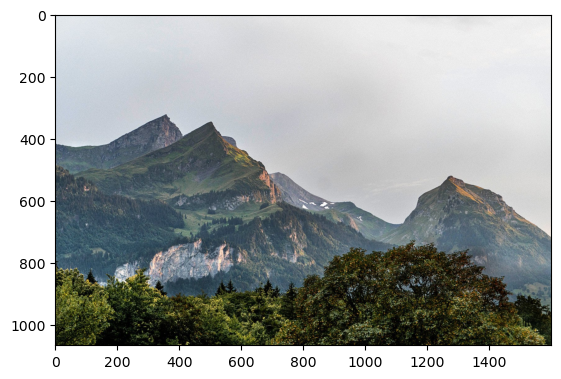

In [19]:
image = Image.open('task1_resources/rgb.jpg')

plt.imshow(image)

Then to convert it into a NumPy array..

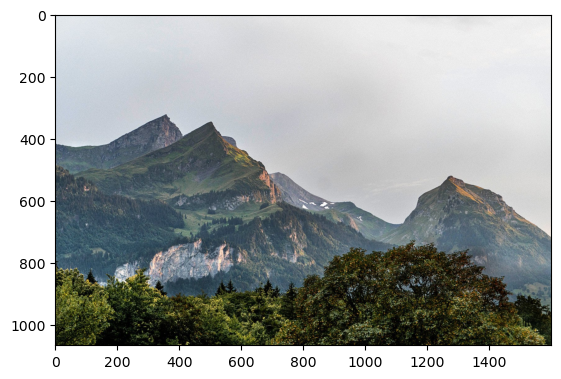

In [33]:
img_data = np.asarray(image)
plt.imshow(img_data)

Looks like the process is pretty much the same! Let's flip the image along the X and Y axes!

In [31]:
img_x_flipped = np.flip(img_data,axis=0)
img_y_flipped = np.flip(img_data,axis=1)
img_full_flipped = np.flip(img_y_flipped,axis=0)
img_direct_flipped = np.flip(img_data,axis=(0,1))

# Don't use np.flip(img_data) here! That will reverse your channel axis too! Your RGB values will become GBR values!

Next up to concatentate..

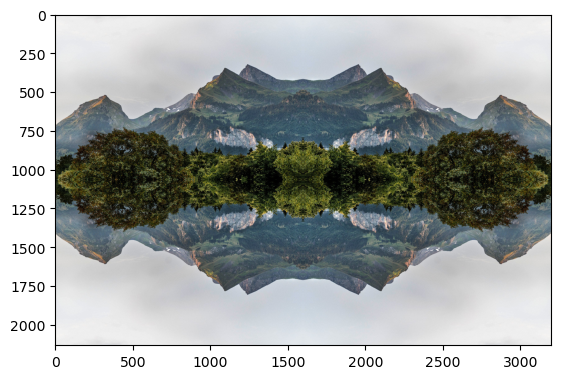

In [30]:
img_top_data = np.concatenate((img_y_flipped,img_data),axis=1)
img_bottom_data = np.concatenate((img_direct_flipped,img_x_flipped),axis=1)

img_final_data = np.concatenate((img_top_data,img_bottom_data),axis=0)

plt.imshow(img_final_data)

And here's the kaleidoscope effect for a color image! That concludes Task 1.


## Task 2: Implementing a Node class to represent values in a Computational Graph

To-do
- Define a Node class with the following attributes:
  - value: Stores the numerical value (NumPy array).
  - children: Tracks dependencies (other Node objects used to compute the
current node).
  - op: Stores the operation that created the node (e.g., "add", "mul").
  - op_args: Stores additional operation-related constants if needed.
- Overload arithmetic operators to support element-wise operations between Node
objects and constants:
  - Addition (+)
  - Subtraction (-)
  - Multiplication (*)
  - Division (/)
  - Exponentiation (**)
- Track dependencies in the computation graph:

   - If an operation involves two Node objects, store both as children.
  - If an operation involves a constant, store only the Node operand.
- Implement a backward() method for the Node class to compute gradients using the chain
rule of differentiation


Let's define the class!

In [1]:
# math for computing logs
import math

class Node:
    # Class constructor
    def __init__(self,value=None,children=None,op=None,op_args=None,grad=0,backward_coeffs=None):
        self.value = value      # Node value
        self.children = children        # Children
        self.op = op        # Operation performed to get here
        self.op_args = op_args      # Additional args
        self.grad = grad        # Gradient of the current Node wrt topmost Node
        self.backward_coeffs = backward_coeffs      # Coefficients to pass to the children Nodes while calculating gradients

    # Override Add
    def __add__(self, other):
        new_node = Node()

        new_node.op = "add"
        new_node.op_args = None

        if isinstance(other,Node):          
            new_node.value = self.value + other.value
            new_node.children = [self, other]
            new_node.backward_coeffs = [1,1]
            
        else:
            new_node.value = self.value + other
            new_node.children = [self]
            new_node.backward_coeffs = [1]

        return new_node

    # Right Addition    
    def __radd__(self,other):
        return self.__add__(other)

    # Override Subtraction
    def __sub__(self, other):
        new_node = Node()

        new_node.op = "sub"
        new_node.op_args = None

        if isinstance(other,Node):          
            new_node.value = self.value - other.value
            new_node.children = [self, other]
            new_node.backward_coeffs = [1,-1]
            
        else:
            new_node.value = self.value - other
            new_node.children = [self]
            new_node.backward_coeffs = [1]

        return new_node
    
    # Right Subtraction
    def __rsub__(self,other):
        return Node(
            value = other.value - self.value if isinstance(other, Node) else (other - self.value),
            children = [self,other] if isinstance(other,Node) else [self],
            op = "sub",
            op_args = None,
            backward_coeffs = [-1,1] if isinstance(other,Node) else [-1]
        )

    # Override Multiplication
    def __mul__(self, other):
        new_node = Node()

        new_node.op = "mul"
        new_node.op_args = None

        if isinstance(other,Node):          
            new_node.value = self.value * other.value
            new_node.children = [self, other]
            new_node.backward_coeffs = [other.value,self.value]
            
        else:
            new_node.value = self.value * other
            new_node.children = [self]
            new_node.backward_coeffs = [other]

        return new_node

    # Right Multiplication
    def __rmul__(self,other):
        return self.__mul__(other)

    # Override Division
    def __truediv__(self, other):
        new_node = Node()

        new_node.op = "truediv"
        new_node.op_args = None

        if isinstance(other,Node):          
            new_node.value = self.value / other.value
            new_node.children = [self, other]
            new_node.backward_coeffs = [1/other.value, -self.value/(other.value**2)]
            
        else:
            new_node.value = self.value / other
            new_node.children = [self]
            new_node.backward_coeffs = [1/other]

        return new_node
    
    # Right Division
    def __rtruediv__(self,other):
        return Node(
            value = other.value / self.value if isinstance(other, Node) else (other / self.value),
            children = [self,other] if isinstance(other,Node) else [self],
            op = "truediv",
            op_args=None,
            backward_coeffs = [-other.value/self.value**2,1/self.value] if isinstance(other,Node) else [-other/self.value**2]
        )

    # Override Exponentiation
    def __pow__(self,other):
        new_node = Node()

        new_node.op = "pow"
        new_node.op_args = None

        if isinstance(other,Node):          
            new_node.value = self.value ** other.value
            new_node.children = [self, other]
            new_node.backward_coeffs = [other.value * self.value ** (other.value-1), new_node.value * math.log(self.value)]
            
        else:
            new_node.value = self.value ** other
            new_node.children = [self]
            new_node.backward_coeffs = [other * self.value ** (other-1)]

        return new_node
    
    # Right Exponentiation
    def __rpow__(self,other):
        return Node(
            value = other.value ** self.value if isinstance(other, Node) else (other ** self.value),
            children = [self,other] if isinstance(other,Node) else [self],
            op = "pow",
            op_args = None,
            backward_coeffs = [other.value ** self.value * math.log(other.value),self.value * other.value**(self.value-1)] if isinstance(other,Node) else [other ** self.value * math.log(other)]
        )
    
    # Method to implement backward propagation
    def backward(self,gradient=1.0):
        self.grad += gradient
        if not self.children is None:
            for i in range(len(self.children)):
                self.children[i].backward(self.backward_coeffs[i]*self.grad)

Let's see if this class works then.

In [2]:
x = Node(1)
y = Node(2)
z = Node(3)

a = (x+y) * z   # (1+3)*3 = 9
print(a.value)

9


Okay, so the overriding seems to work! Let's test the gradient calculation!

In [3]:
import numpy as np

a = Node(np.array([1,2]))
b = Node(np.array([3,4]))

c = a * 2 + b
d = c ** 3
d.backward()
print(a.grad)
print(b.grad)
print(c.grad)

[150. 384.]
[ 75. 192.]
[ 75. 192.]


These values are correct. Hence this works too, and this concludes Task 2!